In [12]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [13]:
# 看結構
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


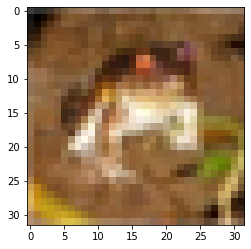

In [14]:
# 畫圖看一下: 第一張訓練圖
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [15]:
# 答案表示方法與MNIST不同
# 1個答案放入1個清單
# 優點: 有擴充性 e.g.一個答案可以有1個以上: [2,3]
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [16]:
# 建答案清單
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

答案是: airplane


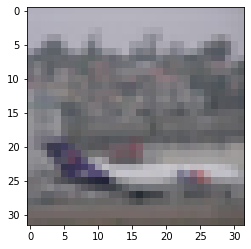

In [17]:
# 自訂查圖片+看答案
import matplotlib.pyplot as plt
idx = 30000
print("答案是:", trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [18]:
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
layers = [
          Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)), # 不是input_dim(一維)
          MaxPooling2D(), # 用預設(2,2)不改
          Conv2D(128, 3, padding="same", activation="relu"),
          MaxPooling2D(),
          Conv2D(256, 3, padding="same", activation="relu"),
          MaxPooling2D(),
          Flatten(),
          # Dense(128, activation="relu"),
          Dense(10, activation="softmax") # 試試頭重(CNN)腳輕(MLP)
]
model = Sequential(layers)
model.summary() # 看摘要
'''

'\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Conv2D, MaxPooling2D\nfrom tensorflow.keras.layers import Dense, Flatten\nlayers = [\n          Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)), # 不是input_dim(一維)\n          MaxPooling2D(), # 用預設(2,2)不改\n          Conv2D(128, 3, padding="same", activation="relu"),\n          MaxPooling2D(),\n          Conv2D(256, 3, padding="same", activation="relu"),\n          MaxPooling2D(),\n          Flatten(),\n          # Dense(128, activation="relu"),\n          Dense(10, activation="softmax") # 試試頭重(CNN)腳輕(MLP)\n]\nmodel = Sequential(layers)\nmodel.summary() # 看摘要\n'

In [19]:
# 改用GAP, 第二次再加看看512層, 或參數不多把池化都去掉試試.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten
layers = [
          Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)), # 不是input_dim(一維)
          MaxPooling2D(), # 用預設(2,2)不改
          Conv2D(128, 3, padding="same", activation="relu"),
          MaxPooling2D(),
          Conv2D(256, 3, padding="same", activation="relu"),
          MaxPooling2D(),
          Conv2D(512, 3, padding="same", activation="relu"), # 再試試看加512
          MaxPooling2D(),
          # Flatten(),
          GlobalAveragePooling2D(),
          # Dense(128, activation="relu"),
          Dense(10, activation="softmax") # 試試頭重(CNN)腳輕(MLP)
]
model = Sequential(layers)
model.summary() # 看摘要

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 256)       

In [20]:
# 輸出一個神經元(二元分類): BinaryCrossEntropy plog(1/q) + (1-p)log(1/1-q)
# 輸出多個神經元: CategoricalCrossEntropy p1log(1/q1) + p2log(1/q2)......
from tensorflow.keras.losses import SparseCategoricalCrossentropy # 不用CategoricalCrossentropy
# from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"]) # 讓他有正確率 (metrics: 指標)

In [21]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [22]:
# batch_size: 你看多少筆再進行一次梯度下降(5[圖片大/訓練資料少]-200[圖片小/訓練資料多])
# epochs: 全體資料(60000) 你要看幾輪(我們什麼時候要停的關鍵)
# validation_split: 測試什麼時候停下來要用沒看過的資料(val loss穩定的時候就停, 不要過擬合)
# (60000 * 0.9) / 200 -> 270
# verbose: 0(quiet) 1(full) 2(no progress bar)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=10, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

Epoch 1/50
225/225 - 5s - loss: 1.6512 - accuracy: 0.3897 - val_loss: 1.3253 - val_accuracy: 0.5144 - 5s/epoch - 24ms/step
Epoch 2/50
225/225 - 4s - loss: 1.2171 - accuracy: 0.5621 - val_loss: 1.0939 - val_accuracy: 0.6002 - 4s/epoch - 20ms/step
Epoch 3/50
225/225 - 5s - loss: 0.9930 - accuracy: 0.6507 - val_loss: 0.8903 - val_accuracy: 0.6864 - 5s/epoch - 20ms/step
Epoch 4/50
225/225 - 5s - loss: 0.8491 - accuracy: 0.7044 - val_loss: 0.8512 - val_accuracy: 0.7052 - 5s/epoch - 20ms/step
Epoch 5/50
225/225 - 4s - loss: 0.7423 - accuracy: 0.7412 - val_loss: 0.7644 - val_accuracy: 0.7314 - 4s/epoch - 20ms/step
Epoch 6/50
225/225 - 4s - loss: 0.6677 - accuracy: 0.7671 - val_loss: 0.7135 - val_accuracy: 0.7566 - 4s/epoch - 20ms/step
Epoch 7/50
225/225 - 5s - loss: 0.5902 - accuracy: 0.7955 - val_loss: 0.7010 - val_accuracy: 0.7608 - 5s/epoch - 20ms/step
Epoch 8/50
225/225 - 4s - loss: 0.5277 - accuracy: 0.8182 - val_loss: 0.6535 - val_accuracy: 0.7744 - 4s/epoch - 20ms/step
Epoch 9/50
225/2

In [24]:
# 做評估
# 輸出是[loss, accuracy]
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.6625 - accuracy: 0.7746


[0.6625214219093323, 0.7746000289916992]

In [26]:
pre = model.predict(x_test_norm).argmax(axis=-1)
print(pre.shape)
print(y_test.shape)
y_test_r = y_test.reshape(10000)
print(y_test_r.shape)

(10000,)
(10000, 1)
(10000,)


In [27]:
# 雙方向(axis=1)
# 在tf用y_test_cat(十個機率), 出tf用y_test(確實答案)
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=-1)
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat,
      columns=["{}(預測)".format(trans[i]) for i in range(10)],
      index=["{}(真實)".format(trans[i]) for i in range(10)])

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),776,10,49,21,19,6,10,18,76,15
automobile(真實),13,865,4,13,2,3,8,4,47,41
bird(真實),49,2,669,59,66,46,67,23,14,5
cat(真實),9,3,58,687,43,106,54,20,12,8
deer(真實),11,2,48,59,724,35,47,62,10,2
dog(真實),10,1,42,211,41,621,25,37,7,5
frog(真實),3,1,31,63,16,13,860,4,6,3
horse(真實),9,2,25,50,38,44,10,815,0,7
ship(真實),29,8,10,13,2,4,4,0,916,14
truck(真實),29,63,12,25,1,3,9,14,31,813


In [28]:
import numpy as np
# 預測不對的idx
# 太多了, 所以我取兩百筆就好
idx = np.nonzero(pre != y_test_r)[0][:200]
# 預測不對的圖的正確答案
pre_false_label = y_test_r[idx]
# 預測不對的圖的預測值
pre_false_pred = pre[idx]
# 預測不對的圖的原圖
pre_false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(trans[pre_false_pred[i]], trans[pre_false_label[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])

Output hidden; open in https://colab.research.google.com to view.

In [32]:
import requests
# 網路上抓圖片測看看
url = input("網址:")
# 爬蟲處理一下, 不要驗證等.
response = requests.get(url, stream=True, verify=False)

網址:https://cw1.tw/CW/images/article/201708/article-598d1b33a34a9.jpg


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


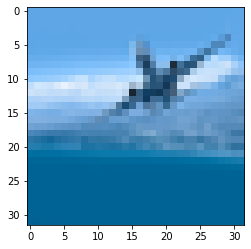

In [33]:
# 使用PIL處理影像 (pillow)
from PIL import Image
img = Image.open(response.raw).resize((32,32)).convert("RGB")
plt.imshow(img)

In [35]:
# 確認輸入shape格式是否正確
# 當初怎麼進去, 現在就要怎麼進去, 所以 (32, 32, 3) 和 (1, 32, 32, 3) 是不一樣的
img_np = np.array(img).reshape(1, 32, 32, 3) / 255.0
prob = model.predict(img_np)[0]
for t, p in zip(trans, prob):
    print(t, "的機率:", round(p, 4))

airplane 的機率: 0.9467
automobile 的機率: 0.0
bird 的機率: 0.0028
cat 的機率: 0.0
deer 的機率: 0.0018
dog 的機率: 0.0
frog 的機率: 0.0
horse 的機率: 0.0
ship 的機率: 0.0486
truck 的機率: 0.0


### 存檔/讀檔